In [1]:
import os
import pandas as pd
from os import path
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:

#该函数是关键，需要根据自己的数据加以修改，将图片存到一个np.array里面，并且制作标签
#因为是两类数据，所以我分别用0,1来表示
def get_image_and_label(idx: int, label_db: dict, image_root: str):
    target = label_db[idx]
    img = cv2.imread(path.join(image_root, str(idx).rjust(6, '0') + ".jpg"))
    return img.reshape(-1), target


def get_ids_and_label_db(label_csv_path: str):
    label_dataframe = pd.read_csv(label_csv_path)
    label_db = {}
    ids = []
    for index, rows in label_dataframe.iterrows():
        idx, label = rows['Id'], rows['Cell type']
        label_db[idx] = label
        ids.append(idx)
    return ids, label_db


def get_data(ids: list, label_db: dict, image_root: str):
    image = []
    label = []
    verbose = 1000
    for idx in ids:
        if idx % 1000 == 0:
            print(f'get {idx}')
        img, target = get_image_and_label(idx, label_db, image_root)
        image.append(img)
        label.append(target)
    
    return image, label


def plot_embedding_2D(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure()
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i]),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

In [3]:
ids, label_db = get_ids_and_label_db('/home/dw-dengwei/dataset/tissue/train.csv')
image, label = get_data(ids, label_db, '/home/dw-dengwei/dataset/tissue/train/')

get 0
get 1000
get 2000
get 3000
get 4000
get 5000
get 6000
get 7000
get 8000
get 9000
get 10000
get 11000
get 12000
get 13000
get 14000
get 15000
get 16000
get 17000
get 18000
get 19000
get 20000
get 21000
get 22000
get 23000
get 24000
get 25000
get 26000
get 27000
get 28000
get 29000
get 30000
get 31000
get 32000
get 33000
get 34000
get 35000
get 36000
get 37000
get 38000
get 39000
get 40000
get 41000
get 42000
get 43000
get 44000
get 45000
get 46000
get 47000
get 48000
get 49000
get 50000
get 51000
get 52000
get 53000
get 54000
get 55000
get 56000
get 57000
get 58000
get 59000
get 60000
get 61000
get 62000
get 63000
get 64000
get 65000
get 66000
get 67000
get 68000
get 69000
get 70000
get 71000
get 72000
get 73000
get 74000
get 75000
get 76000
get 77000
get 78000
get 79000
get 80000
get 81000
get 82000
get 83000
get 84000
get 85000
get 86000
get 87000
get 88000
get 89000
get 90000
get 91000
get 92000
get 93000
get 94000
get 95000
get 96000
get 97000
get 98000
get 99000
get 100000
ge

/home/dw-dengwei/.local/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/dw-dengwei/.local/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Finished......


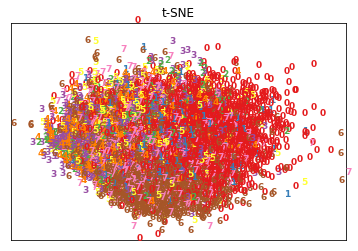

In [5]:
tsne_2D = TSNE(n_components=2, init='pca', random_state=0) #调用TSNE
result_2D = tsne_2D.fit_transform(image[:10000])
print('Finished......')
#调用上面的两个函数进行可视化
fig1 = plot_embedding_2D(result_2D, label[:10000], 't-SNE')
plt.show(fig1)